# TASK 1 - TITANIC SURVIVAL PREDICTION:

* Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

* The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

* Dataset from kaggle - https://www.kaggle.com/datasets/brendan45774/test-file/

In [137]:
## Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
## Reading the csv file using pandas Dataframe:

df = pd.read_csv("tested.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [139]:
## Checking any Null values:

display(df.isnull().sum())      # Age and Cabin have null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [140]:
## Finding shape of Dataframe:

display(df.shape)

(418, 12)

In [141]:
## Finding description of the data in the DataFrame:

display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [142]:
## Checking datatypes of each column:

display(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Cleaning:

In [143]:
## Dropping Cabin column as it has huge null values and which have less impact for survival impact:

df = df.drop("Cabin", axis = 1)
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [144]:
## Dropping null values rows of Age column:

df.dropna(inplace = True)

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


# Performing EDA from above Dataframe:

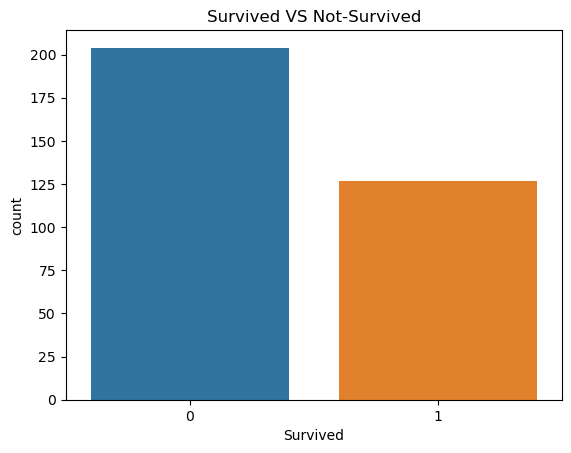

In [145]:
## Survived VS Not-Survived using countplot:

sns.countplot(df, x = df["Survived"])      #here 0 = Not-Survived and 1 = Survived
plt.title("Survived VS Not-Survived")
plt.show()

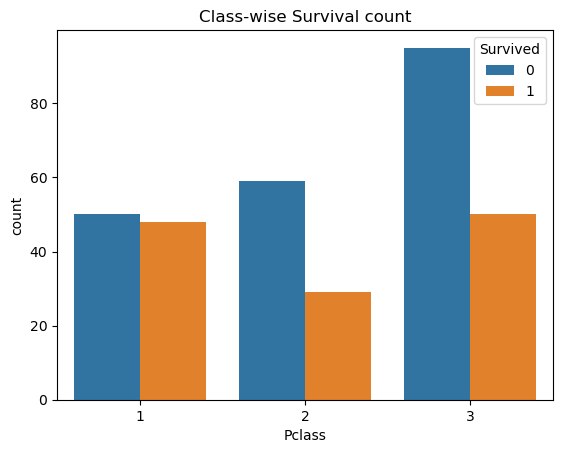

In [146]:
## Finding class wise Survival count:

sns.countplot(df, x = df["Pclass"], hue = "Survived")
plt.title("Class-wise Survival count")
plt.show()

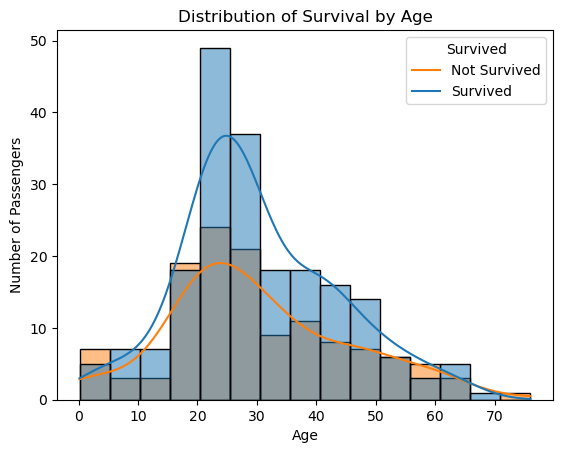

In [147]:
## Age-wise survival distribution:

sns.histplot(df, x='Age', hue='Survived',kde=True)
plt.title('Distribution of Survival by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

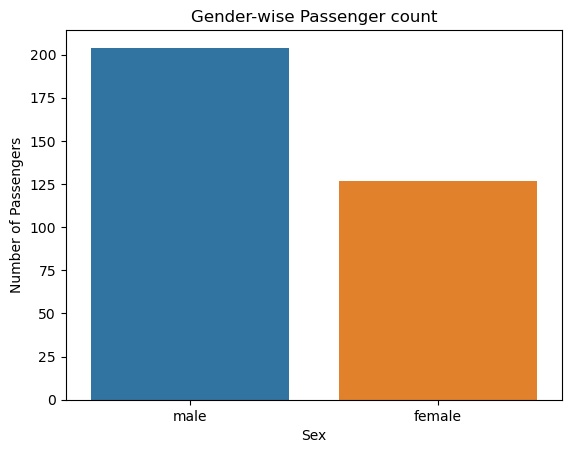

In [148]:
## Gender-wise Passenger count using barplot:

# df["Sex"].value_counts()

sns.barplot(x=df["Sex"].value_counts().index, y=df["Sex"].value_counts().values)
plt.title('Gender-wise Passenger count')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

# Data Pre-processing:

In [149]:
## Label encoding:

##Creating LabelEncoder object:
le = LabelEncoder()

## Encode labels in column 'Sex':

df['Sex']= le.fit_transform(df['Sex'])
print("Dataframe after label encoding 'Sex' column:\n")
display(df)

# Male is encoded as 1
# Female is encoded as 0

Dataframe after label encoding 'Sex' column:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C


# Extract independent and dependent variables into the x and y DataFrames:

In [150]:
## creating independent variables:

print("Independent variables(x) are:")

#removing target variable and columns have less impact for predicting output
x = df.drop(columns=["PassengerId", "Survived", "Name", "Ticket","Embarked"])  
display(x)

## creating dependent variable:
print("Dependent variables(y) is:")  # Survived columns is target variable
y = df.Survived
display(y)

Independent variables(x) are:


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750
411,1,0,37.0,1,0,90.0000
412,3,0,28.0,0,0,7.7750
414,1,0,39.0,0,0,108.9000


Dependent variables(y) is:


0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

# Spliting data into train and test by 20% as test size:

In [151]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("Spliting data into train and test, by 20% as test size:")
print("Shape of the x_train:", x_train.shape)
print("Shape of the x_test:",  x_test.shape)
print("Shape of the y_train:", y_train.shape)
print("Shape of the y_test:",  y_test.shape)

Spliting data into train and test, by 20% as test size:
Shape of the x_train: (264, 6)
Shape of the x_test: (67, 6)
Shape of the y_train: (264,)
Shape of the y_test: (67,)


# Building the model and finding their accuracy:

In [152]:
## Train the model:

model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)

## prediction:

predict_lgr = model_lgr.predict(x_test)
#predict_lgr

## Finding Accuracy:

accuracy_lgr = accuracy_score(y_test,predict_lgr)
accuracy_lgr

1.0

In [153]:
list(y_test)[10]

1

In [154]:
predict_lgr[10]

1

# Testing Sample data:

In [155]:
## Sample dataset1:

data={"Pclass":3,"Sex":1,"Age":27.0,"SibSp":0,"Parch":0,"Fare":8.6625}
test_df1=pd.DataFrame(data,index=[0])
#display(test_df1)

predict_test_df1=model_lgr.predict(test_df1)

if predict_test_df1==1:
    print("This Person is Survived")
else:
    print("This person is Not Survived")


This person is Not Survived


In [156]:
## Sample dataset2:

data={"Pclass":1,"Sex":0,"Age":55.0,"SibSp":2,"Parch":0,"Fare":25.7}
test_df2=pd.DataFrame(data,index=[0])
#display(test_df2)

predict_test_df2=model_lgr.predict(test_df2)

if predict_test_df2==1:
    print("This Person is Survived")
else:
    print("This person is Not Survived")

This Person is Survived
